In [2]:
# Cell 1: Import the required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Cell 2: Load and preprocess the data
train_dir = 'E:\\dv dataset\\chest_xray\\train'
test_dir = 'E:\\dv dataset\\chest_xray\\test'

# Data augmentation for training and normalization for testing
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
# Cell 3: Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


C:\Users\vedan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Cell 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
# Cell 5: Define callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('pneumonia_model.keras', monitor='val_accuracy', save_best_only=True)


In [7]:
# Cell 6: Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/10


C:\Users\vedan\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.7880 - loss: 0.5537 - val_accuracy: 0.8558 - val_loss: 0.3535
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.8887 - loss: 0.2631 - val_accuracy: 0.8061 - val_loss: 0.5432
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.9034 - loss: 0.2489 - val_accuracy: 0.8269 - val_loss: 0.4109
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 164s 922ms/step - accuracy: 0.9073 - loss: 0.2271 - val_accuracy: 0.7837 - val_loss: 0.5080
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 149s 897ms/step - accuracy: 0.9198 - loss: 0.2032 - val_accuracy: 0.8109 - val_loss: 0.4937
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9204 - loss: 0.1962 - val_accuracy: 0.7853 - val_loss: 0.4590


In [8]:
# Cell 7: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 659ms/step - accuracy: 0.8855 - loss: 0.3130
Test accuracy: 85.58%


In [9]:
# Cell 8: Generate classification report and confusion matrix
test_generator.reset()  # Resets the generator for consistent results
y_pred = (model.predict(test_generator) > 0.5).astype("int32")  # Convert predictions to binary (0 or 1)
y_true = test_generator.classes  # True labels

# Classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step
              precision    recall  f1-score   support

      Normal       0.40      0.35      0.37       234
   Pneumonia       0.64      0.68      0.66       390

    accuracy                           0.56       624
   macro avg       0.52      0.52      0.52       624
weighted avg       0.55      0.56      0.55       624

[[ 82 152]
 [124 266]]


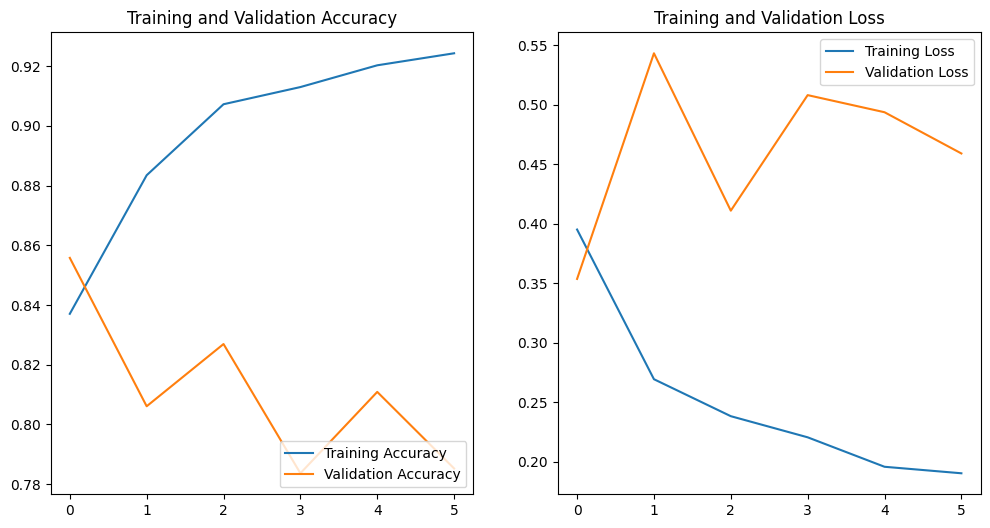

In [10]:
# Cell 9: Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [12]:
# Cell 10: Predict on new images
from tensorflow.keras.preprocessing import image
import numpy as np  # Make sure to import numpy

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Load and resize image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    prediction = model.predict(img_array)
    return "Pneumonia" if prediction > 0.5 else "Normal"

# Example prediction on a new image
img_path = r"C:\\Users\\vedan\\Downloads\\pn1chest.jpeg"  # Use raw string to avoid unicode escape issues
result = predict_image(img_path)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Pneumonia
